<a href="https://colab.research.google.com/github/Shreyashgupta016/My-Projects/blob/main/Aerofit_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The problem statement says that the renowned fitness equipment brand, Aerofit wants to figure out the type of treadmill/s that is/are better suited to various segments of customers. In simpler words, we have to find the correlation between various customer attributes and the product, to better advise Aerofit for their target audience.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749')
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


In [ ]:
df.shape              # shape of the data (the dataset has 180 rows and 9 columns)

(180, 9)

In [ ]:
df.info()             # data types of all the features as well as the number of non-null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [ ]:
df.describe(include='all').round(2)        # Statistical summary of the dataset

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.00,180,180.00,180,180.00,180.00,180.00,180.00
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,KP281,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.79,NaN,15.57,NaN,3.46,3.31,53719.58,103.19
std,NaN,6.94,NaN,1.62,NaN,1.08,0.96,16506.68,51.86
min,NaN,18.00,NaN,12.00,NaN,2.00,1.00,29562.00,21.00
25%,NaN,24.00,NaN,14.00,NaN,3.00,3.00,44058.75,66.00
50%,NaN,26.00,NaN,16.00,NaN,3.00,3.00,50596.50,94.00
75%,NaN,33.00,NaN,16.00,NaN,4.00,4.00,58668.00,114.75


In [ ]:
df['Product'].value_counts()            # Number of each type of treadmills bought within the last 3 months from Aerofit

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

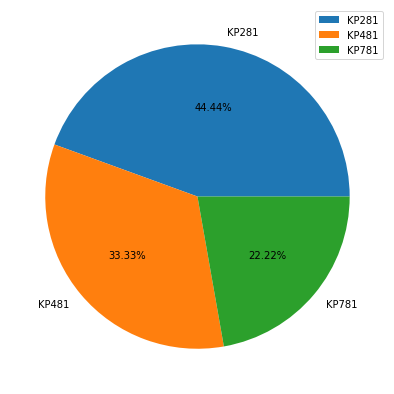

In [ ]:
#Plotting Pieplot to visualize the percentage count of each type of product
plt.figure(figsize=(12,7))
plt.pie(df['Product'].value_counts(), labels=df['Product'].value_counts().index, autopct='%1.2f%%')
plt.legend(loc='upper right')
plt.show()

There are no null values in the dataset, and the dataset contains the information of 180 customers who bought 1 out of the 3 different types of treadmills during the last 3 months.

In [ ]:
df['Gender'].value_counts(normalize=True)           # Probability of usage by each gender

Male      0.577778
Female    0.422222
Name: Gender, dtype: float64

In [ ]:
pd.crosstab(index=df['Gender'], columns=df['Product'])             # Contingency table for Product wrt Gender

Product,KP281,KP481,KP781
Gender,,,
Female,40,29,7
Male,40,31,33


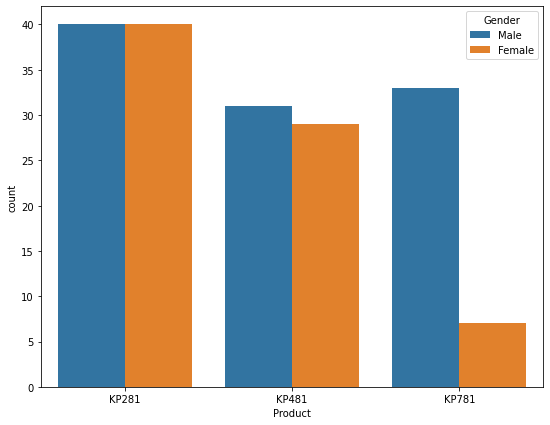

In [ ]:
#Plotting dodged countplot for Gender wrt to each Product 
plt.figure(figsize=(9,7))
sns.countplot(x=df['Product'], hue=df['Gender'])
plt.show()

In [ ]:
# Given Male, what is the probability that the person chooses basic 'KP281' treadmill
print('P(KP281 | Male):',len(df.loc[(df['Gender']=='Male') & (df['Product']=='KP281')])/len(df.loc[df['Gender']=='Male']))

# Given Female, what is the probability that the person chooses basic 'KP281' treadmill
print('P(KP281 | Female):',len(df.loc[(df['Gender']=='Female') & (df['Product']=='KP281')])/len(df.loc[df['Gender']=='Female']))

P(KP281 | Male): 0.38461538461538464
P(KP281 | Female): 0.5263157894736842


In [ ]:
# Given Male, what is the probability that the person chooses advance 'KP781' treadmill
print('P(KP781 | Male):',len(df.loc[(df['Gender']=='Male') & (df['Product']=='KP781')])/len(df.loc[df['Gender']=='Male']))

# Given Female, what is the probability that the person chooses advance 'KP781' treadmill
print('P(KP781 | Female):',len(df.loc[(df['Gender']=='Female') & (df['Product']=='KP781')])/len(df.loc[df['Gender']=='Female']))

P(KP781 | Male): 0.3173076923076923
P(KP781 | Female): 0.09210526315789473


In [ ]:
df['Age'].value_counts(normalize=True).head(5)        # Probability of top 5 ages who bought the maximum treadmills

25    0.138889
23    0.100000
24    0.066667
26    0.066667
28    0.050000
Name: Age, dtype: float64

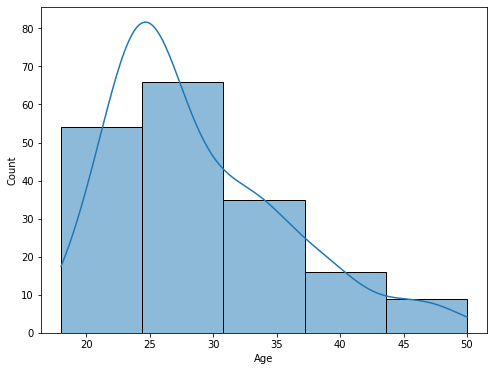

In [ ]:
# Plotting Distplot for Ages of customers
plt.figure(figsize=(8,6))
sns.histplot(df['Age'], bins=5, kde=True)
plt.show()

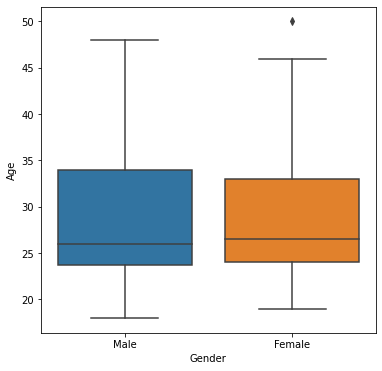

In [ ]:
# Boxplot to visualize the Gender wrt Age
plt.figure(figsize=(6,6))
sns.boxplot(data=df, x='Gender', y='Age')
plt.show()

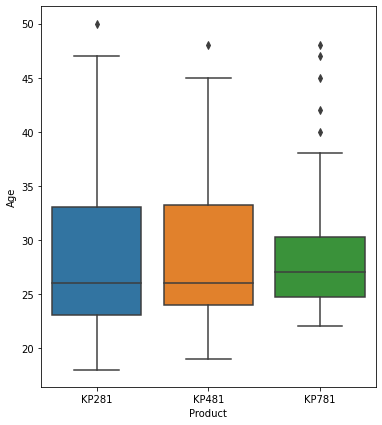

In [ ]:
# Plotting Boxplot for Age of customers wrt each Product
plt.figure(figsize=(6,7))
sns.boxplot(data=df, x='Product', y='Age')
plt.show()

In [ ]:
len(df.loc[df['Age']<=30])

120

In [ ]:
len(df.loc[df['Age']>30])

60

In [ ]:
# Given below 30 years old, what is the probability that the person chooses advance 'KP781' treadmill
print('P(KP781 | Age<=30):',len(df.loc[(df['Age']<=30) & (df['Product']=='KP781')])/len(df.loc[df['Age']<=30]))

# Given above 30 years old, what is the probability that the person chooses advance 'KP781' treadmill
print('P(KP781 | Age>30):',len(df.loc[(df['Age']>30) & (df['Product']=='KP781')])/len(df.loc[df['Age']>30]))

P(KP781 | Age<=30): 0.25
P(KP781 | Age>30): 0.16666666666666666


In [ ]:
# Given below 30 years old, what is the probability that the person chooses basic 'KP281' treadmill
print('P(KP781 | Age<=30):',len(df.loc[(df['Age']<=30) & (df['Product']=='KP281')])/len(df.loc[df['Age']<=30]))

# Given above 30 years old, what is the probability that the person chooses basic 'KP281' treadmill
print('P(KP781 | Age>30):',len(df.loc[(df['Age']>30) & (df['Product']=='KP281')])/len(df.loc[df['Age']>30]))

P(KP781 | Age<=30): 0.4583333333333333
P(KP781 | Age>30): 0.4166666666666667


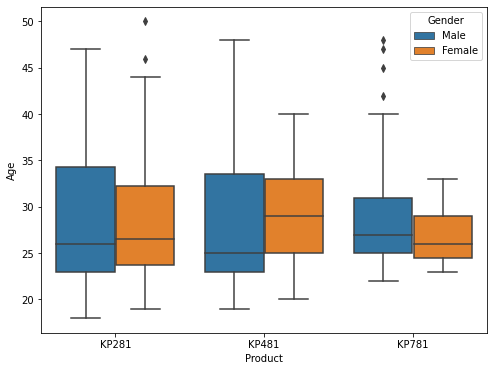

In [ ]:
# Plotting Boxplot to show the relation between each gender and their age for every product 
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x=df['Product'], y=df['Age'], hue=df['Gender'])
plt.show()

In [ ]:
df['Usage'].value_counts(normalize=True)             # Probability of expected usage of all the treadmill products per week

3    0.383333
4    0.288889
2    0.183333
5    0.094444
6    0.038889
7    0.011111
Name: Usage, dtype: float64

In [ ]:
round(pd.crosstab(index=df['Usage'], columns=df['Product'], normalize=True),2)      # Contingency table showing the probability of expected usage for each product per week

Product,KP281,KP481,KP781
Usage,,,
2,0.11,0.08,0.00
3,0.21,0.17,0.01
4,0.12,0.07,0.10
5,0.01,0.02,0.07
6,0.00,0.00,0.04
7,0.00,0.00,0.01


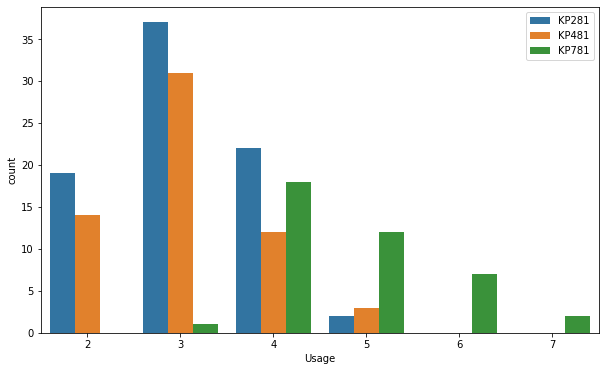

In [ ]:
# Plotting dodged countplot for customer expected usage wrt each Product
plt.figure(figsize=(10,6))
sns.countplot(data=df, x=df['Usage'], hue=df['Product'])
plt.legend(loc='upper right')
plt.show()

In [ ]:
# Given Usage<=3, what is the probability that the person chooses advance 'KP781' treadmill
print('P(KP781 | Usage<=3):',len(df.loc[(df['Usage']<=3) & (df['Product']=='KP781')])/len(df.loc[df['Usage']<=3]))

# Given Usage>3, what is the probability that the person chooses advance 'KP781' treadmill
print('P(KP781 | Usage>3):',len(df.loc[(df['Usage']>3) & (df['Product']=='KP781')])/len(df.loc[df['Usage']>3]))

P(KP781 | Usage<=3): 0.00980392156862745
P(KP781 | Usage>3): 0.5


In [ ]:
# Given Usage<=3, what is the probability that the person chooses advance 'KP281' treadmill
print('P(KP281 | Usage<=3):',len(df.loc[(df['Usage']<=3) & (df['Product']=='KP281')])/len(df.loc[df['Usage']<=3]))

# Given Usage>3, what is the probability that the person chooses advance 'KP281' treadmill
print('P(KP281 | Usage>3):',len(df.loc[(df['Usage']>3) & (df['Product']=='KP281')])/len(df.loc[df['Usage']>3]))

P(KP281 | Usage<=3): 0.5490196078431373
P(KP281 | Usage>3): 0.3076923076923077


In [ ]:
df['Fitness'].value_counts(normalize=True)           # Probability of different ratings given to customers by themselves

3    0.538889
5    0.172222
2    0.144444
4    0.133333
1    0.011111
Name: Fitness, dtype: float64

In [ ]:
round(pd.crosstab(index=df['Fitness'], columns=df['Product'], normalize=True),2)         # Probability of fitness rating for each product

Product,KP281,KP481,KP781
Fitness,,,
1,0.01,0.01,0.00
2,0.08,0.07,0.00
3,0.30,0.22,0.02
4,0.05,0.04,0.04
5,0.01,0.00,0.16


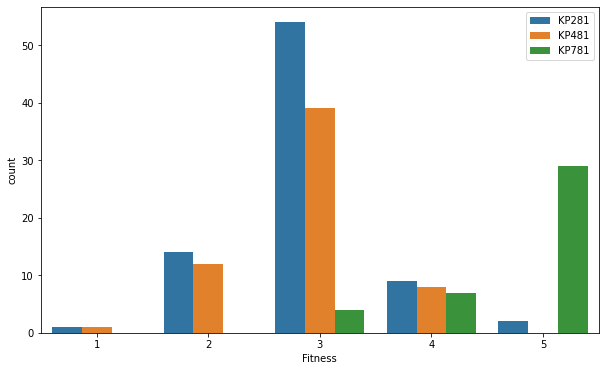

In [ ]:
# Plotting dodged countplot for Fitness wrt each Product
plt.figure(figsize=(10,6))
sns.countplot(data=df, x=df['Fitness'], hue=df['Product'])
plt.legend(loc='upper right')
plt.show()

In [ ]:
# Given Fitness<=3, what is the probability that the person chooses advance 'KP781' treadmill
print('P(KP781 | Fitness<=3):',len(df.loc[(df['Fitness']<=3) & (df['Product']=='KP781')])/len(df.loc[df['Fitness']<=3]))

# Given Fitness>3, what is the probability that the person chooses advance 'KP781' treadmill
print('P(KP781 | Fitness>3):',len(df.loc[(df['Fitness']>3) & (df['Product']=='KP781')])/len(df.loc[df['Fitness']>3]))

P(KP781 | Fitness<=3): 0.032
P(KP781 | Fitness>3): 0.6545454545454545


In [ ]:
# Given Fitness<=3, what is the probability that the person chooses advance 'KP281' treadmill
print('P(KP281 | Fitness<=3):',len(df.loc[(df['Fitness']<=3) & (df['Product']=='KP281')])/len(df.loc[df['Fitness']<=3]))

# Given Fitness>3, what is the probability that the person chooses advance 'KP281' treadmill
print('P(KP281 | Fitness>3):',len(df.loc[(df['Fitness']>3) & (df['Product']=='KP281')])/len(df.loc[df['Fitness']>3]))

P(KP281 | Fitness<=3): 0.552
P(KP281 | Fitness>3): 0.2


In [ ]:
# Given Fitness=3, what is the probability that the person chooses advance 'KP481' treadmill
print('P(KP481 | Fitness==3):',len(df.loc[(df['Fitness']==3) & (df['Product']=='KP481')])/len(df.loc[df['Fitness']==3]))

# Given Fitness>3, what is the probability that the person chooses advance 'KP481' treadmill
print('P(KP481 | Fitness<3):',len(df.loc[(df['Fitness']<3) & (df['Product']=='KP481')])/len(df.loc[df['Fitness']<3]))

# Given Fitness>3, what is the probability that the person chooses advance 'KP481' treadmill
print('P(KP481 | Fitness>3):',len(df.loc[(df['Fitness']>3) & (df['Product']=='KP481')])/len(df.loc[df['Fitness']>3]))

P(KP481 | Fitness==3): 0.4020618556701031
P(KP481 | Fitness<3): 0.4642857142857143
P(KP481 | Fitness>3): 0.14545454545454545


In [ ]:
df['Miles'].median()

94.0

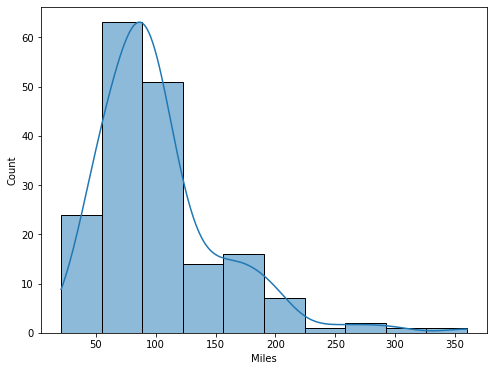

In [ ]:
# Plotting Distplot for Miles expected to run by customers
plt.figure(figsize=(8,6))
sns.histplot(df['Miles'], bins=10, kde=True)
plt.show()

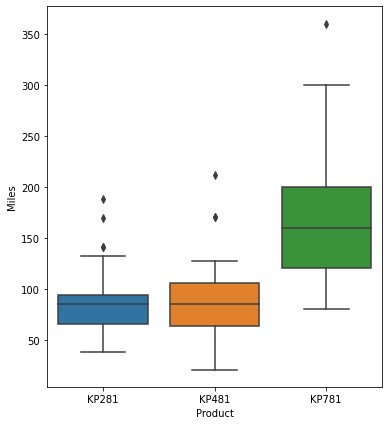

In [ ]:
# Plotting boxplot for expected miles covered by customers wrt each Product
plt.figure(figsize=(6,7))
sns.boxplot(data=df, x=df['Product'], y=df['Miles'])
plt.show()

In [ ]:
# Given Miles<110, what is the probability that the person chooses advance 'KP781' treadmill
print('P(KP781 | Miles<110):',len(df.loc[(df['Miles']<110) & (df['Product']=='KP781')])/len(df.loc[df['Miles']<110]))

# Given Miles>=110, what is the probability that the person chooses advance 'KP781' treadmill
print('P(KP781 | Miles>=110):',len(df.loc[(df['Miles']>=110) & (df['Product']=='KP781')])/len(df.loc[df['Miles']>=110]))

P(KP781 | Miles<110): 0.07142857142857142
P(KP781 | Miles>=110): 0.5740740740740741


In [ ]:
# Given Miles<110, what is the probability that the person chooses advance 'KP281' treadmill
print('P(KP281 | Miles<110):',len(df.loc[(df['Miles']<110) & (df['Product']=='KP281')])/len(df.loc[df['Miles']<110]))

# Given Miles>=110, what is the probability that the person chooses advance 'KP281' treadmill
print('P(KP281 | Miles>=110):',len(df.loc[(df['Miles']>=110) & (df['Product']=='KP281')])/len(df.loc[df['Miles']>=110]))

P(KP281 | Miles<110): 0.5158730158730159
P(KP281 | Miles>=110): 0.2777777777777778


In [ ]:
df['Income'].median()

50596.5

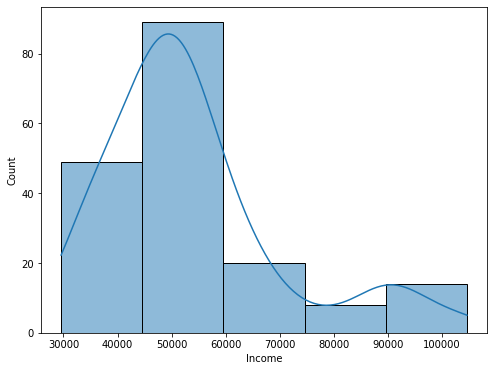

In [ ]:
# Plotting Distplot for Income of customers
plt.figure(figsize=(8,6))
sns.histplot(df['Income'], bins=5, kde=True)
plt.show()

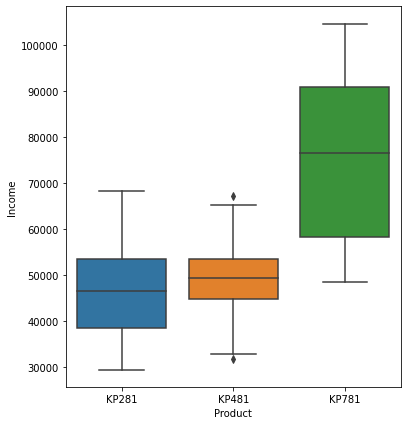

In [ ]:
# Plotting boxplot for Income of customers wrt each Product
plt.figure(figsize=(6,7))
sns.boxplot(data=df, x='Product', y='Income')
plt.show()

In [ ]:
# Given Income<60000, what is the probability that the person chooses advance 'KP781' treadmill
print('P(KP781 | Income<60000):',len(df.loc[(df['Income']<60000) & (df['Product']=='KP781')])/len(df.loc[df['Income']<60000]))

# Given Income>=60000, what is the probability that the person chooses advance 'KP781' treadmill
print('P(KP781 | Income>=60000):',len(df.loc[(df['Income']>=60000) & (df['Product']=='KP781')])/len(df.loc[df['Income']>=60000]))

P(KP781 | Income<60000): 0.07971014492753623
P(KP781 | Income>=60000): 0.6904761904761905


In [ ]:
# Given Income<60000, what is the probability that the person chooses advance 'KP281' treadmill
print('P(KP281 | Income<60000):',len(df.loc[(df['Income']<60000) & (df['Product']=='KP281')])/len(df.loc[df['Income']<60000]))

# Given Income>=60000, what is the probability that the person chooses advance 'KP281' treadmill
print('P(KP281 | Income>=60000):',len(df.loc[(df['Income']>=60000) & (df['Product']=='KP281')])/len(df.loc[df['Income']>=60000]))

P(KP281 | Income<60000): 0.5362318840579711
P(KP281 | Income>=60000): 0.14285714285714285


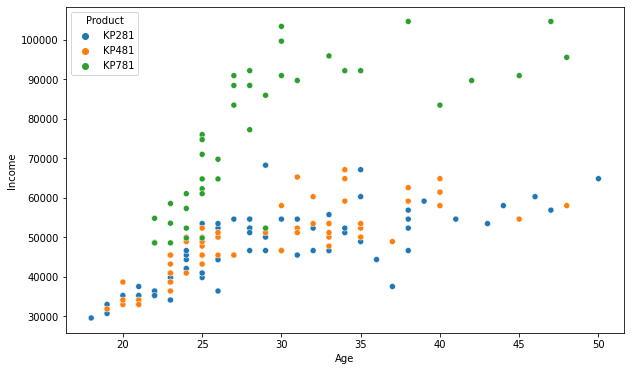

In [ ]:
#Scatterplot to visualize the relation between each product and the income & age of customers
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Age', y='Income', hue='Product')
plt.show()

<Figure size 576x504 with 0 Axes>

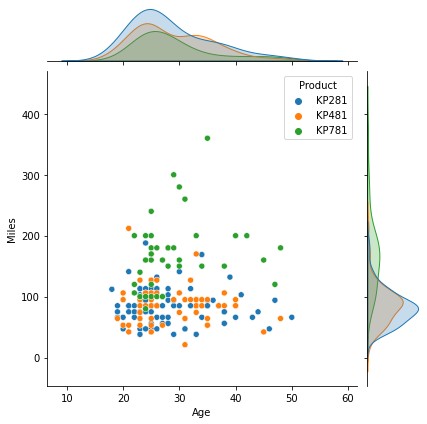

In [ ]:
# Plotting jointplot to visualize the expected miles run/walk and age of every customer wrt product of each type
plt.figure(figsize=(8,7))
sns.jointplot(data=df, x='Age', y='Miles',  hue='Product')
plt.show()

<Figure size 576x504 with 0 Axes>

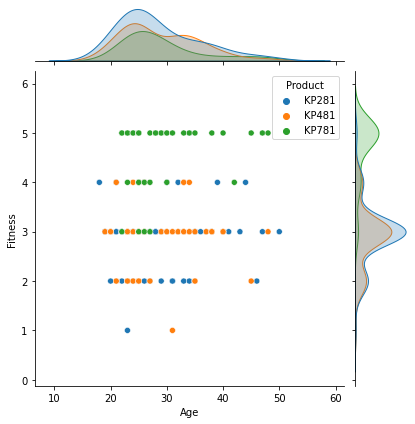

In [ ]:
# Plotting jointplot to visualize the fitness and age of every customer wrt product of each type
plt.figure(figsize=(8,7))
sns.jointplot(data=df, x='Age', y='Fitness',  hue='Product')
plt.show()

<Figure size 576x504 with 0 Axes>

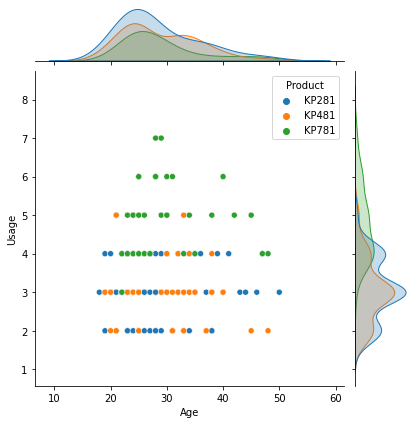

In [ ]:
# Plotting jointplot to visualize the expected usage and age of every customer wrt product of each type
plt.figure(figsize=(8,7))
sns.jointplot(data=df, x='Age', y='Usage',  hue='Product')
plt.show()

In [ ]:
df.corr()        # Correlation between the continuous data

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


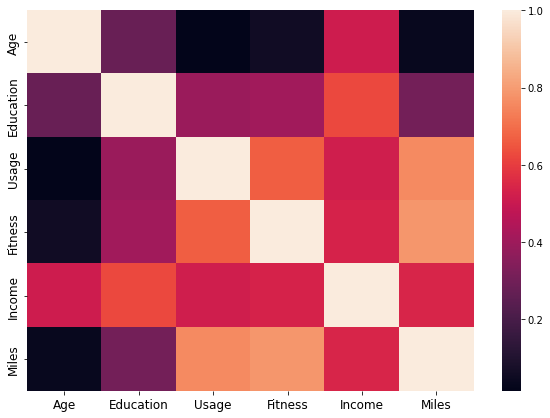

In [ ]:
# Heatmap to find the correlation between the continuous data
plt.figure(figsize=(10,7))
sns.heatmap(df.corr())
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [ ]:
round(df['Education'].value_counts(normalize=True),2)              # Probability of different years of education that customers have

16    0.47
14    0.31
18    0.13
15    0.03
13    0.03
12    0.02
21    0.02
20    0.01
Name: Education, dtype: float64

In [ ]:
# Contingency table showing the probability for years of education wrt each product
round(pd.crosstab(index=df['Education'], columns=df['Product'], normalize=True),2)

Product,KP281,KP481,KP781
Education,,,
12,0.01,0.01,0.00
13,0.02,0.01,0.00
14,0.17,0.13,0.01
15,0.02,0.01,0.00
16,0.22,0.17,0.08
18,0.01,0.01,0.11
20,0.00,0.00,0.01
21,0.00,0.00,0.02


In [ ]:
df['Education'].median()

16.0

In [ ]:
# Given Education<16 years, what is the probability that the person chooses advance 'KP781' treadmill
print('P(KP781 | Education<16):',len(df.loc[(df['Education']<16) & (df['Product']=='KP781')])/len(df.loc[df['Education']<16]))

# Given Education>=16 years, what is the probability that the person chooses advance 'KP781' treadmill
print('P(KP781 | Education>=16):',len(df.loc[(df['Education']>=16) & (df['Product']=='KP781')])/len(df.loc[df['Education']>=16]))

P(KP781 | Education<16): 0.029411764705882353
P(KP781 | Education>=16): 0.3392857142857143


In [ ]:
# Given Education<16 years, what is the probability that the person chooses advance 'KP281' treadmill
print('P(KP281 | Education<16):',len(df.loc[(df['Education']<16) & (df['Product']=='KP281')])/len(df.loc[df['Education']<16]))

# Given Education>=16 years, what is the probability that the person chooses advance 'KP281' treadmill
print('P(KP281 | Education>=16):',len(df.loc[(df['Education']>=16) & (df['Product']=='KP281')])/len(df.loc[df['Education']>=16]))

P(KP281 | Education<16): 0.5735294117647058
P(KP281 | Education>=16): 0.36607142857142855


In [ ]:
# Contingency table showing the probability for each Product wrt Marital Status
round(pd.crosstab(index=df['MaritalStatus'], columns=df['Product'], margins=True, normalize=True),2)     

Product,KP281,KP481,KP781,All
MaritalStatus,,,,
Partnered,0.27,0.20,0.13,0.59
Single,0.18,0.13,0.09,0.41
All,0.44,0.33,0.22,1.00


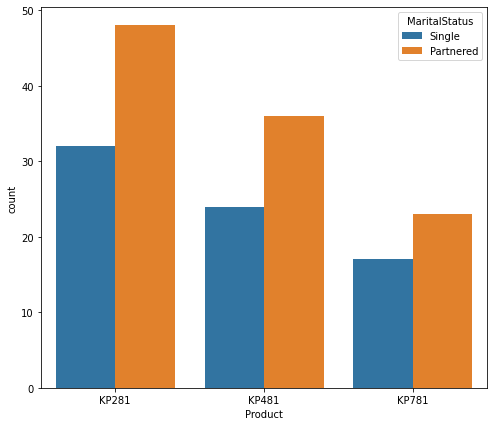

In [ ]:
# Plotting dodged countplot for Marital Status wrt each Product
plt.figure(figsize=(8,7))
sns.countplot(data=df, x=df['Product'], hue=df['MaritalStatus'])
plt.show()

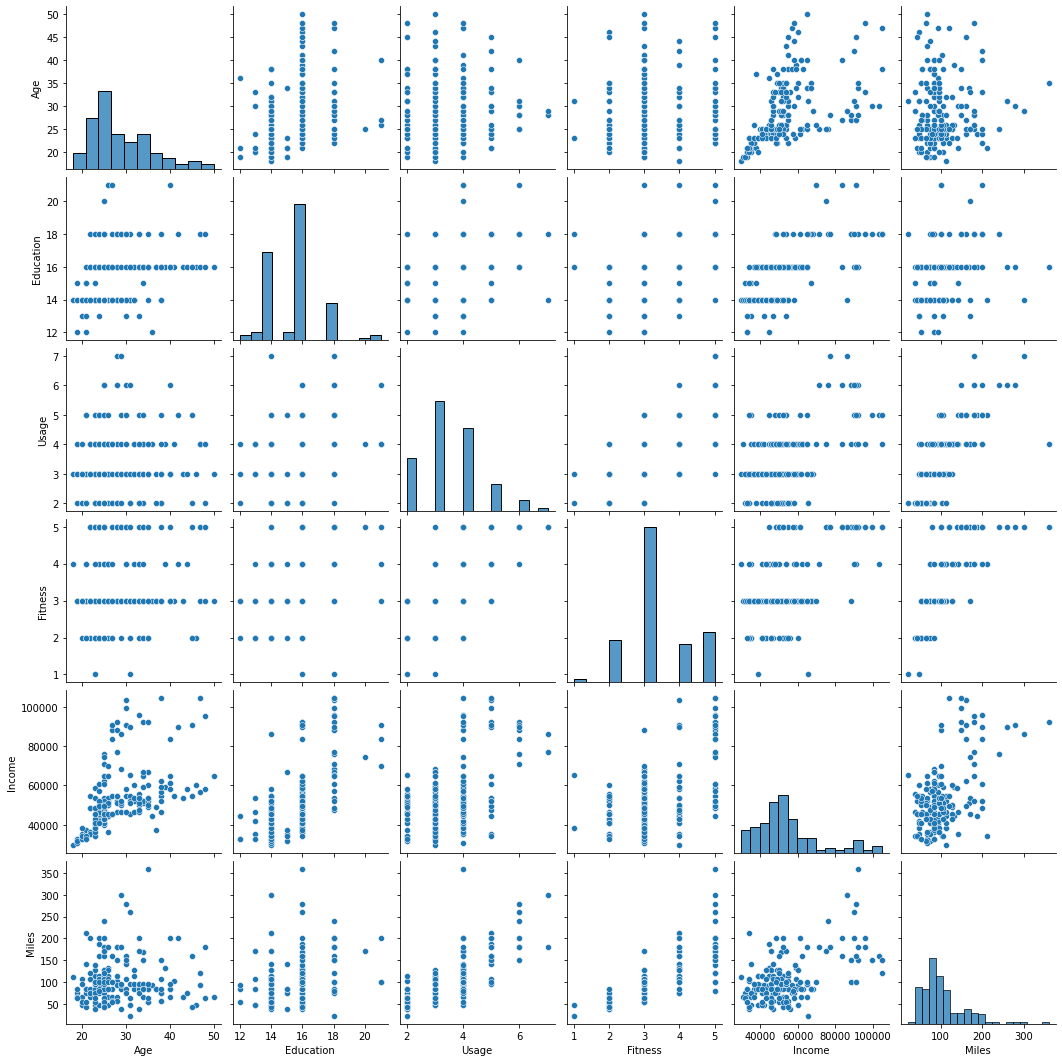

In [ ]:
sns.pairplot(data=df)

**Business Insights:**

	1.	The most sold treadmill product is KP281 (basic version), which is bought by 80 people and the probability of customers buying KP281 is 0.5, while the probability for advanced version KP781 accounts for only 0.125.
	2.	Out of all the males, the probability of buying KP281 is the maximum which is 0.38 but the probability of buying KP781 is also very significant accounting to 0.32, which is not the case in females as the probability of busying KP281 is 0.52 but for KP781 is 0.09, which means that males are active than females, and carry on their journey towards fitness more than the females.
	3.	People who are in the age bracket of 23 to 28 years are more concerned about their health, and therefore the top 5 most number of buys of the treadmills came under this age group.
	4.	People tend to use treadmills 3 times a week the most. The probability of using treadmill 3 times a week is 0.38. For usage above 3, people tend to use KP781 more having probability of 0.5. For usage below or equal to 3 times a week, people use KP281 the most with probability 0.55.
	5.	The customer rating for their fitness level is mostly 3/5. For fitness levels greater than 3, customers tend to use KP781 which has a staggering probability of 0.65, but for fitness level less than 3, KP281 is most suited.
	6.	The median miles expected to run/walk on the treadmill is 94. The probability of using treadmill KP781 is 0.57 when the expected miles run by a person is more than 110, rather than for people running less than 110. Similarly, people who are willing to run less than 110 miles tend to use KP281 more, as the probability is hefty 0.52.
	7.	The people who have a lower income, let’s say below 60000, tend to use treadmill KP281 more. The conditional probability for that is 0.54, while the conditional probability for people using KP781 is 0.69 as these people tend to have higher income.
	8.	Most people have education of 16 years, and the people who have education for less than 16 years tend to have lower income which makes the possibility of buying KP281 more with the probability 0.57, but for people having education more than 16 years have higher income and buy KP781 more with the probability of 0.34.
	9.	People who are more fitter, expected to have high usage of treadmill, and who have high income tend to buy KP781 more but most people fall out of this segment and hence they prefer buying KP281 more to start with.

**Recommendations:**

	1.	The main focus should be on selling KP281 treadmill as it is the most bought treadmill and has a high probability of being sold out compared to the other 2 treadmills.
	2.	The KP781 treadmill is equally sold among males as compared to KP281 to males and therefore KP781 should be advertised more among males.
	3.	Young people especially the ones below 30 are more active and are more concerned about their health. Therefore, the focus of selling treadmills should be more on people below 30. 
	4.	Younger people tend to buy treadmill KP781 more than the people who are above 30. The ones buying KP781 and are above 30 years of age tend to very high income, and hence KP781 should be directed towards people who meet this criteria. 
	5.	Most of the people tend to use treadmill 3 times a week and the most preferred treadmill for people using it 3 or less than 3 times a week will be KP281. 
	6.	The significant number of people want to use treadmill more than 3 times a week and for that they prefer KP781 the most. Therefore, the marketing of each treadmill should be done by looking at the past record of the customer usage.
	7.	KP781 treadmill should be advertised among the people who are very fit (in the category 4 and 5), but for people who are less fit (in the category less than 3), the optimal choice for them is KP281 and KP481.
	8.	KP281 treadmill should be publicised among the people who have an annual salary less than $60000, while the ones having salary more than this mark go for KP781. This will have a very high chance of buying these treadmills.
	9.	A person who has more than 16 years of education has a high possibility of buying KP781 treadmill because of high income which is positively correlated with years of education.
	10.	The treadmill KP281 should be marketed more but for the male customers who have a positive correlation between usage, income, and fitness should be targeted with KP781 and KP481 treadmills.